### Classifying the reviews as negative or positive review
[Data source](http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)
* Positive -> 1
* Negative -> 0

### Importing libraries and dataset

In [1]:
#importing libraries
import pandas as pd

In [15]:
# Load the dataset
df_yelp = pd.read_table('yelp_labelled.txt')
df_imdb = pd.read_table('imdb_labelled.txt')
df_amz = pd.read_table('amazon_cells_labelled.txt')

In [16]:
# concatenate the 3 datasets into one
frames = [df_yelp,df_imdb,df_amz]

In [17]:
df_imdb.columns

Index(['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ', '0'], dtype='object')

In [45]:
#the dataset doesn't have column header so providing column header
for colname in frames:
    colname.columns = ['message', 'label']

In [46]:
# Column names
for colname in frames:
    print(colname.columns)

Index(['message', 'label'], dtype='object')
Index(['message', 'label'], dtype='object')
Index(['message', 'label'], dtype='object')


In [47]:
#assigning a key to make it easier to read the dataset
keys = ['Yelp','IMDB','Amazon']

In [48]:
#merger the dataset to dataframe
df = pd.concat(frames, keys=keys)

In [49]:
#shape of the df
df.shape

(2745, 2)

In [50]:
df.head()

message  label
Yelp 0                                 Crust is not good.      0
     1          Not tasty and the texture was just nasty.      0
     2  Stopped by during the late May bank holiday of...      1
     3  The selection on the menu was great and so wer...      1
     4     Now I am getting angry and I want my damn pho.      0

In [51]:
df.tail()

message  label
Amazon 994  The screen does get smudged easily because it ...      0
       995  What a piece of junk.. I lose more calls on th...      0
       996                       Item Does Not Match Picture.      0
       997  The only thing that disappoint me is the infra...      0
       998  You can not answer calls with the unit, never ...      0

In [52]:
#df to csv file for more clear understanding
df.to_csv("sentimentdataset.csv")

In [53]:
df

message  label
Yelp   0                                   Crust is not good.      0
       1            Not tasty and the texture was just nasty.      0
       2    Stopped by during the late May bank holiday of...      1
       3    The selection on the menu was great and so wer...      1
       4       Now I am getting angry and I want my damn pho.      0
...                                                       ...    ...
Amazon 994  The screen does get smudged easily because it ...      0
       995  What a piece of junk.. I lose more calls on th...      0
       996                       Item Does Not Match Picture.      0
       997  The only thing that disappoint me is the infra...      0
       998  You can not answer calls with the unit, never ...      0

[2745 rows x 2 columns]

In [68]:
# changing order of columns for better view
df = df[['label', 'message']]
df.head()

label                                            message
Yelp 0      0                                 Crust is not good.
     1      0          Not tasty and the texture was just nasty.
     2      1  Stopped by during the late May bank holiday of...
     3      1  The selection on the menu was great and so wer...
     4      0     Now I am getting angry and I want my damn pho.

### Data Cleaning

In [69]:
#check column names
df.columns

Index(['label', 'message'], dtype='object')

In [70]:
#checking if it has missing values
df.isnull().sum()

label      0
message    0
dtype: int64

#### Working with sapcy
* to remove stopwords
* lemmatizing

In [ ]:
#installing spacy
!pip install spacy

In [ ]:
#installing the english module
import sys
!{sys.executable} -m spacy download en

In [73]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [74]:
nlp = spacy.load('en')

In [75]:
#list of stopwords for filtering
stopwords = list(STOP_WORDS)
stopwords[:10]

['why',
 'where',
 'any',
 'further',
 'himself',
 '‘ve',
 'not',
 'beside',
 'here',
 'were']

##### before applying to the dataset lets see how it works for dummy data

In [79]:
docx = nlp("This is how John Walker was walking. He was also running beside the lawn.")

In [80]:
# Lemmatizing of tokens
for word in docx:
    print(word.text,"Lemma =>",word.lemma_)

This Lemma => this
is Lemma => be
how Lemma => how
John Lemma => John
Walker Lemma => Walker
was Lemma => be
walking Lemma => walk
. Lemma => .
He Lemma => -PRON-
was Lemma => be
also Lemma => also
running Lemma => run
beside Lemma => beside
the Lemma => the
lawn Lemma => lawn
. Lemma => .


In [81]:
# Lemma that are not pronouns
for word in docx:
    if word.lemma_ != "-PRON-":
        print(word.lemma_.lower().strip())

this
be
how
john
walker
be
walk
.
be
also
run
beside
the
lawn
.


In [82]:
# List Comprehensions of our Lemma
[word.lemma_.lower().strip() for word in docx if word.lemma_ != "-PRON-"]

['this',
 'be',
 'how',
 'john',
 'walker',
 'be',
 'walk',
 '.',
 'be',
 'also',
 'run',
 'beside',
 'the',
 'lawn',
 '.']

In [86]:
# Filtering out Stopwords and Punctuations
for word in docx:
    if word.is_stop == False and not word.is_punct:
        print(word)

John
Walker
walking
running
lawn


In [87]:
# Stop words and Punctuation In List Comprehension
[word for word in docx if word.is_stop == False and not word.is_punct]

[John, Walker, walking, running, lawn]

#### now back to the df operation

In [76]:
#using the punctuations of string module
import string
punctuations = string.punctuation

In [77]:
# Creating a Spacy Parser
from spacy.lang.en import English
parser = English()

In [78]:
#custom function tokenization
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

In [67]:
#new column after applying tokenization (just to see how it looks)
df['msg_clean'] = df['message'].apply(lambda x: spacy_tokenizer(x))
df.head()

message  label  \
Yelp 0                                 Crust is not good.      0   
     1          Not tasty and the texture was just nasty.      0   
     2  Stopped by during the late May bank holiday of...      1   
     3  The selection on the menu was great and so wer...      1   
     4     Now I am getting angry and I want my damn pho.      0   

                                                msg_clean  
Yelp 0                                      [crust, good]  
     1                            [tasty, texture, nasty]  
     2  [stopped, late, bank, holiday, rick, steve, re...  
     3                   [selection, menu, great, prices]  
     4                  [getting, angry, want, damn, pho]

### Machine Learning with Sklearn

In [123]:
# ML Packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [89]:
#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [90]:
# Vectorization using CountVectorizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1)) 
classifier = LinearSVC()

In [91]:
# splitting the train-test dataset
from sklearn.model_selection import train_test_split

In [92]:
#before train-test split lest separate the df 
X = df['message']
y = df['label']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Creating the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

In [96]:
# Fit our data
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7f74c45ea9e8>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x7f74c00b3c80>,
                                 vocabulary=None)),
                ('classifier',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                

In [97]:
# Predicting with a test dataset
y_pred = pipe.predict(X_test)

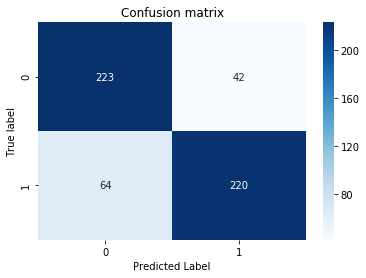

In [114]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

matrix = np.array(confusion_matrix(y_test, y_pred))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix')
plt.ylim(2, 0)
plt.show()

In [113]:
# the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       265
           1       0.84      0.77      0.81       284

    accuracy                           0.81       549
   macro avg       0.81      0.81      0.81       549
weighted avg       0.81      0.81      0.81       549



In [119]:
# Accuracy on training set
print("Accuracy: ",pipe.score(X_train,y_train))

Accuracy:  0.9895264116575592


In [120]:
#predicting on random dataset

example = ["I do enjoy learning machine learning",
 "What a poor product!,I will have to get a new one",
 "Its amazing today, sunny day"]
pipe.predict(example)

array([1, 0, 1])

In [ ]:
# view the prediction results in the test data
# 1 = Positive review
# 0 = Negative review
for (sample,pred) in zip(X_test,y_pred):
    print(sample,"Prediction=>",pred)

### lets try with the Tfidf vectorizer

In [124]:
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [125]:
# Creating the  pipeline to clean, tokenize, vectorize, and classify 
pipe_tfidf = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

In [127]:
pipe_tfidf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7f74c18d7eb8>),
                ('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_wor...
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x7f74c00b3c80>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LinearSVC(C=1.0, class_wei

In [128]:
# Predicting with a test dataset
y_pred1 = pipe_tfidf.predict(X_test)

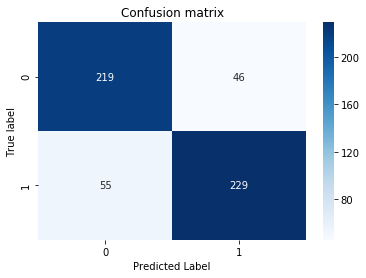

In [129]:
#confusion matrix
matrix = np.array(confusion_matrix(y_test, y_pred1))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix')
plt.ylim(2, 0)
plt.show()

In [130]:
# the classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       265
           1       0.83      0.81      0.82       284

    accuracy                           0.82       549
   macro avg       0.82      0.82      0.82       549
weighted avg       0.82      0.82      0.82       549



#### it shows that both of the vectorizer performs almost similar